#Google Drive Connection


---



---



In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/HardhatFiles

#Upload and Unzip Dataset


---



---



In [ ]:
# !wget "https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.0.0/Nature.zip" 

In [ ]:
!unzip Hardhat.zip

#Install Dependencies


---



---



In [ ]:
!pip3 install tensorflow==2.5
!pip3 install tensorflow--gpu==2.5
!pip3 install imgaug==0.2.9
!pip install pixellib==0.5.2
!pip install labelme2coco==0.1.0
!pip install Pillow==8.2

#Download Pre-Trained Model


---



---



In [1]:
cd /content/drive/MyDrive/HardhatFiles

/content/drive/MyDrive/HardhatFiles


In [ ]:
!wget "https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.2/mask_rcnn_coco.h5"

#Visualize Dataset


---



---



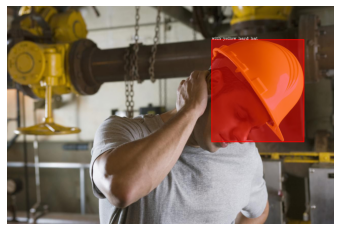

In [2]:
import pixellib
from pixellib.custom_train import instance_custom_training

vis_img = instance_custom_training()
vis_img.load_dataset("/content/drive/MyDrive/HardhatFiles/Hardhat")
vis_img.visualize_sample()

#Train a custom model using your dataset


---



---



###Using Resnet101
Training Mask-RCNN consumes a lot of memory. On google colab using resnet101 as network backbone, you will be able to train with a batchsize of 4. The default network backbone is resnet101. Resnet101 is used as a default backbone because it appears to reach a lower validation loss during training faster than resnet50. It also works better for a dataset with multiple classes and much more images.

In [3]:
cd /content/drive/MyDrive/HardhatFiles

/content/drive/MyDrive/HardhatFiles


In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2, batch_size = 4)
train_maskrcnn.load_pretrained_model("/content/drive/MyDrive/HardhatFiles/mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("/content/drive/MyDrive/HardhatFiles/Hardhat")
train_maskrcnn.train_model(num_epochs = 300, augmentation=True,  path_trained_models = "mask_rcnn_models")

###Using Resnet50
The advantage with resnet50 is that it consumes lesser memory. Thus, you can use a batch_size of 6 or 8 on google colab depending on how colab randomly allocates GPU.

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet50", num_classes= 2, batch_size = 6)
train_maskrcnn.load_pretrained_model("insert the file path of the pretrained model>")
train_maskrcnn.load_dataset("insert the file path of the dataset folder>")
train_maskrcnn.train_model(num_epochs = 10, augmentation=True, path_trained_models = "mask_rcnn_models")

#Model Evaluation


---



---



##Evaluation for Single Model

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training


train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2)
train_maskrcnn.load_dataset("insert the file path of the dataset folder>")
train_maskrcnn.evaluate_model("<insert the file path of the single model for evaluation>")

##Evaluate Multiple Models

In [ ]:
import pixellib
from pixellib.custom_train import instance_custom_training


train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 2)
train_maskrcnn.load_dataset("/content/drive/MyDrive/HardhatFiles/Hardhat")
train_maskrcnn.evaluate_model("/content/drive/MyDrive/HardhatFiles/mask_rcnn_models")

#Inference Custom Model

In [ ]:
import os
import pixellib
from pixellib.instance import custom_segmentation

test_Image = "/content/drive/Shareddrives/Hardhat_Files/Hardhat/test"
detected_Image = "/content/drive/Shareddrives/Hardhat_Files/Model6/"
model = "/content/drive/Shareddrives/Hardhat_Files/mask_rcnn_models_6/mask_rcnn_model.024-0.313419.h5"

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 2, class_names= ["BG", "with white hard hat", "with yellow hard hat"])
segment_image.load_model(model)
for filename in os.listdir(test_Image):
    if filename.endswith("jpg"): 
      segment_image.segmentImage(test_Image+"/"+filename, show_bboxes=True, output_image_name=detected_Image+filename)
      print(filename, " | done....")